<img src="Figuras - Desafio 4/logo.png" style="width:1450px;height:250px"/>

# Ilum Escola de Ci√™ncia
### Curso: Termodin√¢mica Avan√ßada
### Prof: Amauri Jardim de Paula
### Alunos: ******* ******* e ******* ******
### Desafio 4

#
# Descri√ß√£o do desafio
O quarto desafio para solu√ß√£o do problema principal da disciplina envolve:
### **A opera√ß√£o do ciclo Rankine a partir da energia da combust√£o calculada na atividade 3.**

Considerando esse ciclo de Rankine um ciclo ideal

# Problemas
##### Para tal, alguns aspectos importantes devem ser considerados.:
##### A. Defina como funciona o ciclo de Rankine.
##### B. Use valores de entalpia para √°gua-vapor de √°gua tabelados para c√°lculo da efici√™ncia
##### C.  Considere se o ciclo fosse de Carnot. Nesse caso, qual a efici√™ncia te√≥rica?


#
# Resolu√ß√µes

## Importa√ß√µes

In [1]:
# Rode essa c√©lula antes de rodar as seguintes, pois elas se utilizam das seguintes bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funcoes_desafio_4 import *

## Problema A

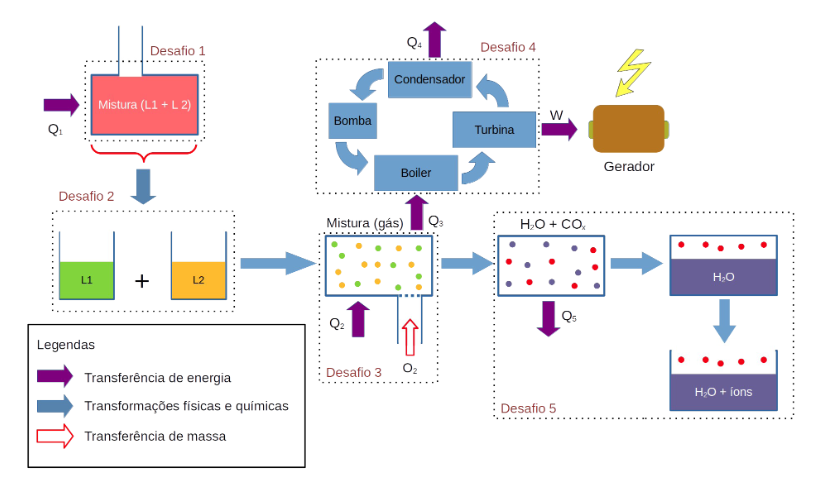

## Recapitula√ß√£o

Antes de come√ßarmos o quarto desafio, √© importante retomar o que foi feito nos desafios anteriores e o que obtemos como resultado deles:

A nossa mistura inicialmente consistia em uma tonelada de √°gua com etanol a 40% v/v e, por meio da destila√ß√£o fracionada, separamo-la em etanol enriquecido e √°gua pura. Ap√≥s disso, evaporamos o etanol enriquecido a 81.54¬∞C, o que gerou **384.73 kg de etanol enriquecido gasoso**. Por fim, realizamos eletr√≥lise da √°gua, atrav√©s da qual extra√≠mos **47.85 kg de hidrog√™nio gasoso**. Tudo isso foi feito √† press√£o constante de 1 atm.

A partir dos valores de massa, temperatura e press√£o, no √∫ltimo desafio, obtemos a entalpia e a entropia geradas pela combust√£o do etanol enriquecido e do hidrog√™nio: respectivamente **-17376284.38 kJ** e **‚àí5279693.78 ùëò ùêΩ/ùêæ**.

Com isso, no presente desafio, definiremos as caracter√≠sticas do nosso ciclo de Rankine, incluindo massa de √°gua envolvida, os valores de temperatura da fonte quente e da fonte fria e, por fim, a efici√™ncia do nosso ciclo (e compar√°-la com efici√™ncia te√≥rica do ciclo de Carnot).



O ciclo de Rankine √© um ciclo termodin√¢mico comumente utilizado em usinas de energia t√©rmica para gerar eletricidade. Consiste em quatro etapas principais: aquecimento, expans√£o, resfriamento e compress√£o. Cada etapa √© associada a uma f√≥rmula espec√≠fica para o c√°lculo da entropia e da temperatura. Vamos explicar cada uma etapa separadamente

## Problema A

### Boiler

Nesta etapa, √°gua √© aquecida em uma caldeira para formar vapor de alta press√£o e temperatura. Para esta etapa, foi utilizado o diagrama de Temperatura por Entropia, o qual √© obtido experimentalmente a partir de sistemas de √°gua saturada, entre l√≠quido e vapor. A partir desse diagrama, √© poss√≠vel identificar as regi√µes em que a √°gua est√° em estado l√≠quido, gasoso ou em mudan√ßa de fase. Portanto, √© poss√≠vel identificar o estado da √°gua ap√≥s a adi√ß√£o de calor ao sistema, proveniente da combust√£o do etanol e do hidrog√™nio.

Primeiramente, n√≥s retiramos alguns dados sobre a temperatura e a entropia da √°gua saturada (l√≠quido-vapor) do site [McGrau Hill](https://www.accessengineeringlibrary.com/content/book/9780071830829/back-matter/appendix4?implicit-login=true), a fim de se obter o diagrama TS. Os dados foram obtidos experimentalmente e publicados em [1].

In [2]:
ARQUIVO_EXCEL = "Dados - Desafio 4/diagrama_TS - vapor table.xlsx" # Chamando o arquivo excel
NOME_DA_PLANILHA_O = "Planilha 1" # Definindo a planila do arquivo xlsx que ser√° utilizada
LINHA_CABECALHO = 0  # Definindo quantas linhas de cabe√ßalho existem, considerando que a primeira linha √© a n√∫mero 0
COLUNAS_CONTENDO_OS_DADOS = [0, 12, 13] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna √© a n√∫mero 0

df_TS = pd.read_excel( # Criando o Data Frame do diagrama TS da √°gua
    ARQUIVO_EXCEL,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS,
)

df_TS.head()

T, ¬∞C    sf.1    sg.1
0   0.01  0.0000  9.1571
1   2.00  0.0305  9.1043
2   5.00  0.0761  9.0266
3  10.00  0.1510  8.9016
4  15.00  0.2244  8.7822

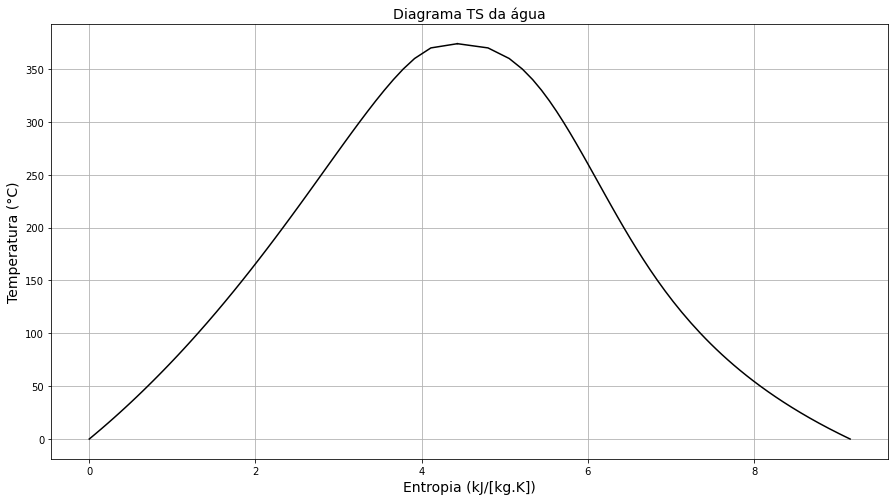

In [3]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111)
df_TS.plot('sf.1', 'T, ¬∞C', ax = ax1, c = 'black', legend = False)
df_TS.plot('sg.1', 'T, ¬∞C', ax = ax1, c = 'black', legend = False)
plt.xlabel('Entropia (kJ/[kg.K])', fontsize = 14)
plt.ylabel('Temperatura (¬∞C)', fontsize = 14)
plt.title("Diagrama TS da √°gua",
          fontsize=14)

plt.grid()

plt.show()

[1] J. H. Keenan, F. G. Keyes, P. G. Hill, and J. G. Moore, Steam Tables, Wiley, New York, 1969

Ap√≥s a obten√ß√£o dos dados, foi necess√°rio definir qual seria a din√¢mica da √°gua presente no nosso ciclo, para isso, foram utilizados dados em que a √°gua estava em uma press√£o de 5 MPa, obtidos em [McGrau Hill](https://www.accessengineeringlibrary.com/content/book/9780071830829/back-matter/appendix4?implicit-login=true) e publicados experimentalmente em [2].

In [4]:
ARQUIVO_EXCEL = "Dados - Desafio 4/√Ågua L√≠quida - Tabela.xlsx" # Chamando o arquivo excel
NOME_DA_PLANILHA_O = "Planilha 1" # Definindo a planila do arquivo xlsx que ser√° utilizada
LINHA_CABECALHO = 0  # Definindo quantas linhas de cabe√ßalho existem, considerando que a primeira linha √© a n√∫mero 0
COLUNAS_CONTENDO_OS_DADOS = [0, 14] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna √© a n√∫mero 0

df_H2O = pd.read_excel( # Criando o Data Frame do aumento de temperatura da √°gua
    ARQUIVO_EXCEL,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS,
)

df_H2O.head()

T     s.3
0   20  0.2956
1   40  0.5705
2   60  0.8285
3   80  1.0720
4  100  1.3030

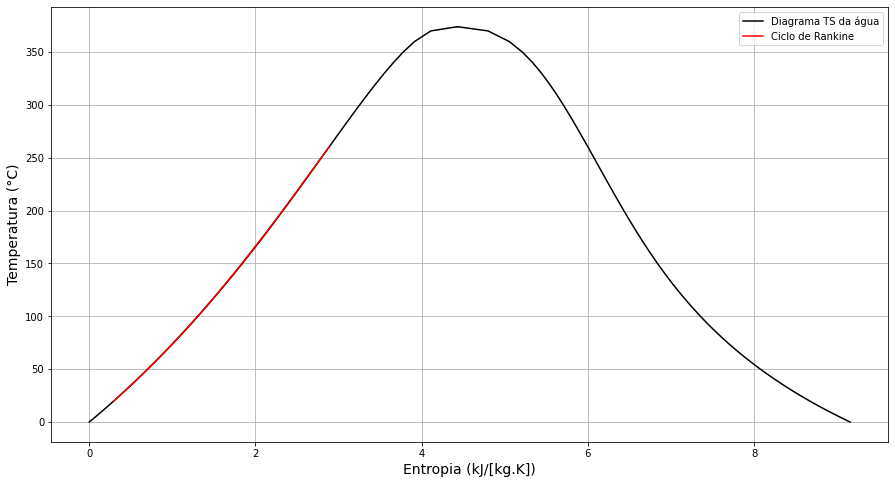

In [5]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111)
df_TS.plot('sf.1', 'T, ¬∞C', ax = ax1, c = 'black', legend = True, label = 'Diagrama TS da √°gua')
df_TS.plot('sg.1', 'T, ¬∞C', ax = ax1, c = 'black', legend = False)
df_H2O.plot('s.3', 'T', ax = ax1, c = 'red', legend = True, label = 'Ciclo de Rankine')
plt.xlabel('Entropia (kJ/[kg.K])', fontsize = 14)
plt.ylabel('Temperatura (¬∞C)', fontsize = 14)

plt.grid()

plt.show()

[2] Keenan, Keyes, Hill, and Moore, Steam Tables, Wiley, New York, 1969; G. J. Van Wylen and R. E. Sonntag, Fundamentals of Classical Thermodynamics, Wiley, New York, 1973.

√â poss√≠vel notar que a √°gua, mostrada em vermelho, mantem condi√ß√µes de temperatura e entropia muito pr√≥ximas aos valores de √°gua saturada, mostrados em preto, no entanto, essas curvas s√≥ se intersectam no ponto de temperatura 260 ¬∞C, assim como mostrado em [LearChemE](https://learncheme.com/simulations/thermodynamics/thermo-1/ts-diagram-for-water/), ou seja, nesse ponto, a √°gua entra em ebuli√ß√£o. Como a evapora√ß√£o da √°gua √© uma mudan√ßa de fase isot√©rmica, √© poss√≠vel represent√°-la, no diagrama TS, como um segmento entre os pontos de mesma temperatura do gr√°fico.

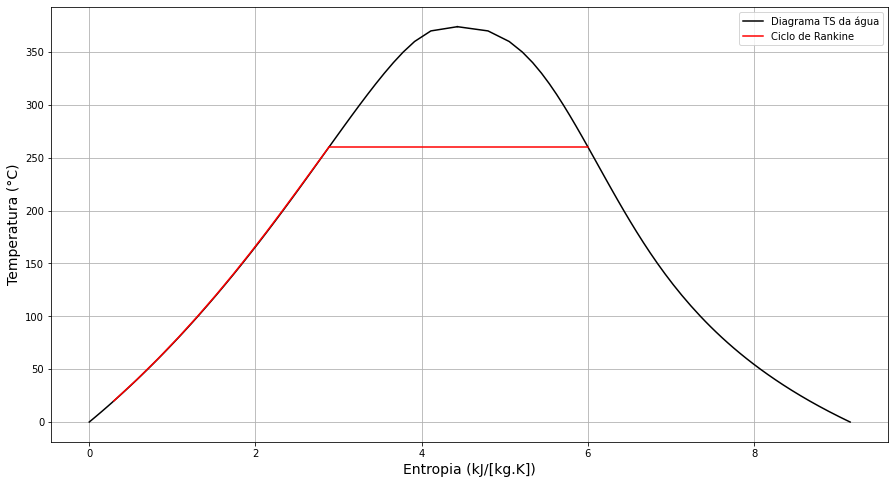

In [6]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111)
df_TS.plot('sf.1', 'T, ¬∞C', ax = ax1, c = 'black', legend = True, label = 'Diagrama TS da √°gua')
df_TS.plot('sg.1', 'T, ¬∞C', ax = ax1, c = 'black', legend = False)
df_H2O.plot('s.3', 'T', ax = ax1, c = 'red', legend = True, label = 'Ciclo de Rankine')
ax1.plot([2.8844, 6.0028], [260, 260], c = 'red')
plt.xlabel('Entropia (kJ/[kg.K])', fontsize = 14)
plt.ylabel('Temperatura (¬∞C)', fontsize = 14)
    
plt.grid()

plt.show()

Ap√≥s a evapora√ß√£o completa da √°gua, √© poss√≠vel, ainda, aumentar a temperatura do vapor, dessa forma, foi escolhido que se aumentaria o valor da temperatura at√© se atingir valores de entropia iguais a 8.6680 kJ/(kg.K), ou seja, um valor em que n√£o houvesse aumento de entropia na passagem pela turbina. Para isso, seria necess√°rio estudar os valores de temperatura e entropia para o vapor de √°gua, no entanto, devido √† falta de conjunto de dados com essas informa√ß√µes, foi feito uma estimativa a partir da equa√ß√£o:

$
S(T) = S(T_0) + \int_{T}^{T_0} \frac{cp}{T} \,dT
$

√â v√°lido ressaltar que o diagrama TS, assim como os dados experimentais utilizados anteriormente, d√° valores de entropia em kJ/(kg.K), ou seja, valores de entropia correspondentes a um kilograma de √°gua, portanto, n√£o √© necess√°rio adicionar o termo de massa da √°gua na equa√ß√£o acima.

Portanto, foram utilizados os dados de calor espec√≠fico do vapor d'√°gua presentes em [Engineering Tool Box](https://www.engineeringtoolbox.com/water-vapor-d_979.html) para realizar a integral apresentada na f√≥rmula de maneira num√©rica, atrav√©s do m√©todo do trap√©zio.

In [7]:
ARQUIVO_EXCEL = "Dados - Desafio 4/Calor espec√≠fico - √Ågua.xlsx" # Chamando o arquivo excel
NOME_DA_PLANILHA_O = "Planilha 1" # Definindo a planila do arquivo xlsx que ser√° utilizada
LINHA_CABECALHO = 0  # Definindo quantas linhas de cabe√ßalho existem, considerando que a primeira linha √© a n√∫mero 0
COLUNAS_CONTENDO_OS_DADOS_1 = [0, 2] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna √© a n√∫mero 0
COLUNAS_CONTENDO_OS_DADOS_2 = [6, 8] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna √© a n√∫mero 0

df_cal_esp_vap = pd.read_excel( # Criando o Data Frame do calor espec√≠fico do vapor d'√°gua por temperatura
    ARQUIVO_EXCEL,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS_1,
)

df_cal_esp_liq = pd.read_excel( # Criando o Data Frame do calor espec√≠fico da √°gua por temperatura
    ARQUIVO_EXCEL,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS_2,
)

In [8]:
# defini√ß√£o de algumas constantes
TEMP_EVAP = 260 # ¬∞C
ENTROPIA_EVAP = 6.0028 # kJ/(kg.K)

# c√°lculo dos pontos de entropia e temperatura do vapor d'√°gua
temp_vap = []
entrop_vap = []
print('temperatura', '', 'entropia')
for temp in df_cal_esp_vap['T']:
    temp_vap.append(temp)
    entrop_vap.append(entropia_por_temperatura_vapor(temp, df_cal_esp_vap, TEMP_EVAP, ENTROPIA_EVAP))
    print(temp, '        ', entropia_por_temperatura_vapor(temp, df_cal_esp_vap, TEMP_EVAP, ENTROPIA_EVAP))
    if entropia_por_temperatura_vapor(temp, df_cal_esp_vap, TEMP_EVAP, ENTROPIA_EVAP) > 8.6680:
        break

temperatura  entropia
260          6.0028
275          6.054358598256749
300          6.137403725765615
325          6.217155984155676
350          6.293967334719323
375          6.368128856990949
400          6.439879205942053
450          6.577063808457944
500          6.706830586982717
550          6.830270001560632
600          6.948219742864056
650          7.061348346499528
700          7.170218263506863
750          7.27528275660629
800          7.376928834545341
850          7.475513899190901
900          7.571327254580764
950          7.6646005488569156
1000          7.755557179905836
1050          7.84437658566672
1100          7.931198545070667
1150          8.016148497229377
1200          8.099321272027101
1250          8.1808186068573
1300          8.260732919665926
1350          8.339132029080053
1400          8.416092517395606
1500          8.565925488978632
1600          8.710551900956242


Portanto, √© poss√≠vel perceber que a entropia que o valor de temperatura que mais se aproxima de uma entropia igual a 8.6680 kJ/(kg.K) √© o valor de 1600 ¬∞C, ou seja, seria necess√°rio esquentar a √°gua at√© a temperatura de 1600 ¬∞C, essa condi√ß√£o de temperatura √© poss√≠vel devido ao fato de que a press√£o no boiler √© igual a 5 MPa. √â importante ressaltar que essa an√°lise n√£o est√° considerando a optimiza√ß√£o econ√¥mica do ciclo de rankine e nem levando em considera√ß√£o fatores relativos √† estrutura dos equipamentos.

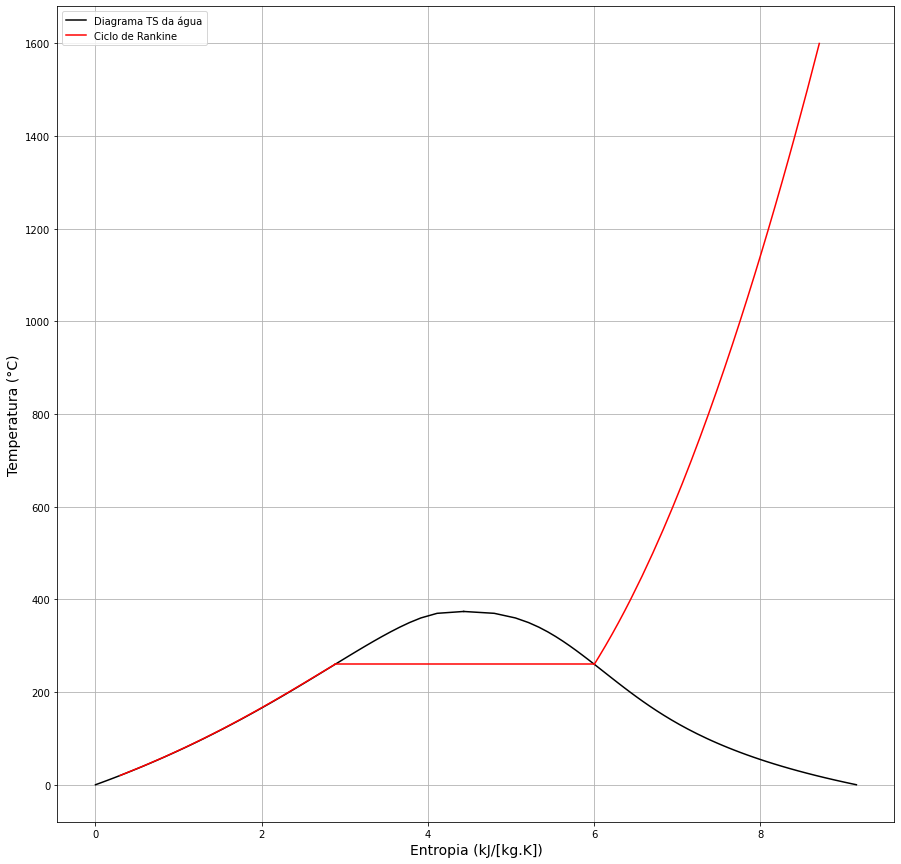

In [9]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(111)
df_TS.plot('sf.1', 'T, ¬∞C', ax = ax1, c = 'black', legend = True, label = 'Diagrama TS da √°gua')
df_TS.plot('sg.1', 'T, ¬∞C', ax = ax1, c = 'black', legend = False)
df_H2O.plot('s.3', 'T', ax = ax1, c = 'red', legend = True, label = 'Ciclo de Rankine')
ax1.plot([2.8844, 6.0028], [260, 260], c = 'red')
ax1.plot(entrop_vap, temp_vap, c = 'red')
plt.xlabel('Entropia (kJ/[kg.K])', fontsize = 14)
plt.ylabel('Temperatura (¬∞C)', fontsize = 14)
    
plt.grid()

plt.show()

Por fim, √© necess√°rio levar em conta a quantidade de energia proveniente da combust√£o do hidrog√™nio e do etanol para estimar a massa de √°gua utilizada, atrav√©s da qual seja poss√≠vel o aumento de temperatura proposto.

Para isso, primeiramente, iremos calcular a entalpia utilizada no aumento da temperatura da √°gua at√© o ponto de ebuli√ß√£o (260 ¬∞C), a partir da equa√ß√£o:

$
H(T) = H(T_0) + m \int_{T}^{T_0} cp \,dT
$

Portanto, ser√£o utilizados os valores de calor espec√≠fico da √°gua l√≠quida obtidos em [Engineering Tool Box](https://www.engineeringtoolbox.com/specific-heat-capacity-water-d_660.html).

Ap√≥s, calcularemos a entalpia envolvida no processo de evapora√ß√£o da √°gua, a partir do valor de entalpia de evapora√ß√£o √† 260 ¬∞C, presente em [McGrau Hill](https://www.accessengineeringlibrary.com/content/book/9780071830829/back-matter/appendix4?implicit-login=true) e obtido experimentalmente em [1].

Enfim, iremos calcular a entalpia utilizada no aumento da temperatura do vapor d'√°gua at√© 1600 ¬∞C, a partir dos valores de calor espec√≠fico do vapor d'√°gua obtidos anteriormente e utilizando, novamente, a equa√ß√£o:

$
H(T) = H(T_0) + m \int_{T}^{T_0} cp \,dT
$

Por fim, todas essas entalpias ser√£o somadas para se calcular a entalpia total utilizada no boiler, ou seja, a entalpia necess√°ria para o ciclo de rankine. Note que esse valor depende da massa de √°gua utilizada, portanto, ser√° utilizado o m√©todo da secante para se calcular valores de massa que aproximem a entalpia necess√°ria para o funcionamento do ciclo a 17376284.38 kJ, entalpia dispon√≠vel pela combust√£o do hidrog√™nio e do etanol.

In [10]:
# defini√ß√£o de algumas constantes
TEMP_INIT = 20 # ¬∞C
TEMP_FINAL = 1600 # ¬∞C
ENTALPIA_EVAP_260 = 1662.5 # kJ/kg
ENTALPIA_COMBUSTAO = 17376284.38 # kJ

# defini√ß√£o do m√©todo da secante.
def f(m):
    return ENTALPIA_COMBUSTAO - entalpia_boiler(TEMP_INIT, TEMP_EVAP, TEMP_FINAL, ENTALPIA_EVAP_260, m, df_cal_esp_liq, df_cal_esp_vap)

def metodo_secante(chute_zero, chute_um, erro):
    p0 = chute_zero
    p = chute_um
    while abs(f(p)) > erro:
        p_grava = p
        p = p - (p - p0)*f(p)/(f(p) - f(p0))
        p0 = p_grava
    return p

In [11]:
# determina√ß√£o da √°gua que ser√° utilizada
MASSA_AGUA = metodo_secante(2000, 2100, 1) # kg
ENTALPIA_BOILER = entalpia_boiler(TEMP_INIT, TEMP_EVAP, TEMP_FINAL, ENTALPIA_EVAP_260, MASSA_AGUA, df_cal_esp_liq, df_cal_esp_vap) # kJ
print(MASSA_AGUA, ENTALPIA_BOILER)

3039.5760511531103 17376284.379999977


Portanto, para o funcionamento do ciclo na maneira como hav√≠amos planejado, ser√° necess√°rio a utiliza√ß√£o de 3039.57 kg de √°gua, correspondendo a uma entalpia utilizada no boiler igual a aproximadamente **17376284.38 kJ**.

### Turbina 
O vapor de alta press√£o gerado na caldeira √© direcionado para uma turbina, onde se expande e realiza trabalho mec√¢nico. Durante essa expans√£o adiab√°tica, a entropia do vapor √© constante. A temperatura do vapor na sa√≠da da turbina √© calculada usando a f√≥rmula de expans√£o adiab√°tica, que relaciona as temperaturas e press√µes antes e depois da expans√£o.

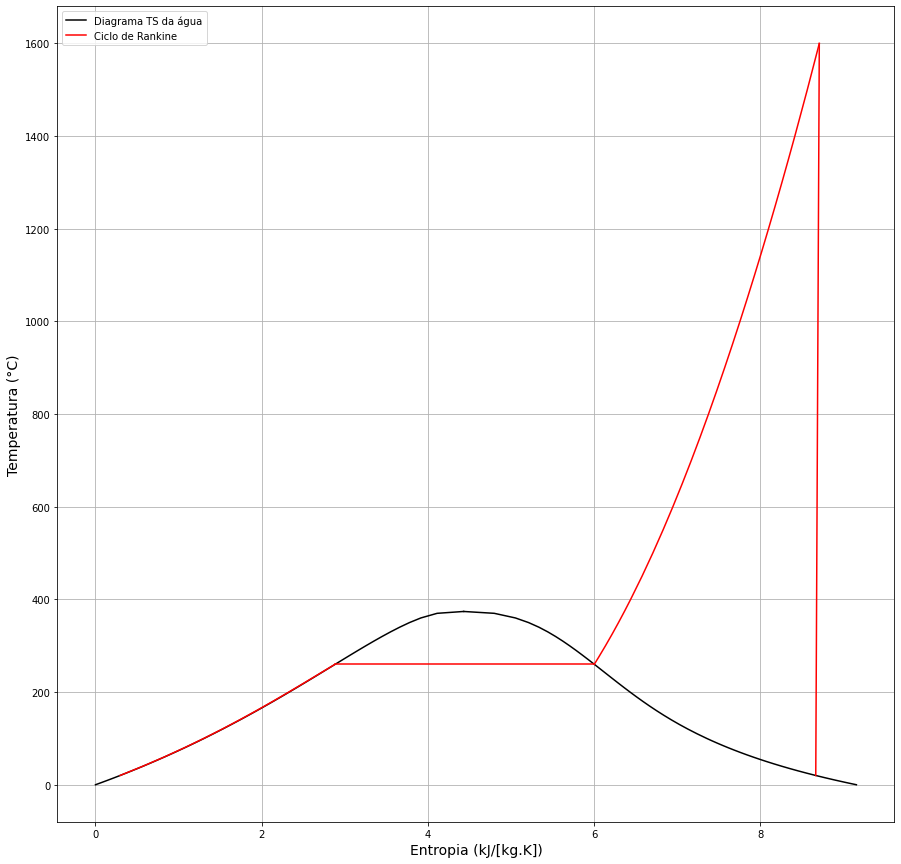

In [12]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(111)
df_TS.plot('sf.1', 'T, ¬∞C', ax = ax1, c = 'black', legend = True, label = 'Diagrama TS da √°gua')
df_TS.plot('sg.1', 'T, ¬∞C', ax = ax1, c = 'black', legend = False)
df_H2O.plot('s.3', 'T', ax = ax1, c = 'red', legend = True, label = 'Ciclo de Rankine')
ax1.plot([2.8844, 6.0028], [260, 260], c = 'red')
ax1.plot(entrop_vap, temp_vap, c = 'red')
ax1.plot([entrop_vap[-1], 8.6680], [temp_vap[-1], 20], c = 'red')
plt.xlabel('Entropia (kJ/[kg.K])', fontsize = 14)
plt.ylabel('Temperatura (¬∞C)', fontsize = 14)

plt.grid()

plt.show()

### Condensador 
O vapor de baixa press√£o que sai da turbina √© enviado para um condensador, onde √© resfriado e condensado em √°gua l√≠quida. Nessa etapa, a entropia do vapor aumenta devido √† transfer√™ncia de calor com o ambiente. A temperatura do vapor √© calculada usando a equa√ß√£o de conserva√ß√£o de energia, que leva em considera√ß√£o o calor trocado e as mudan√ßas de entalpia e entropia.

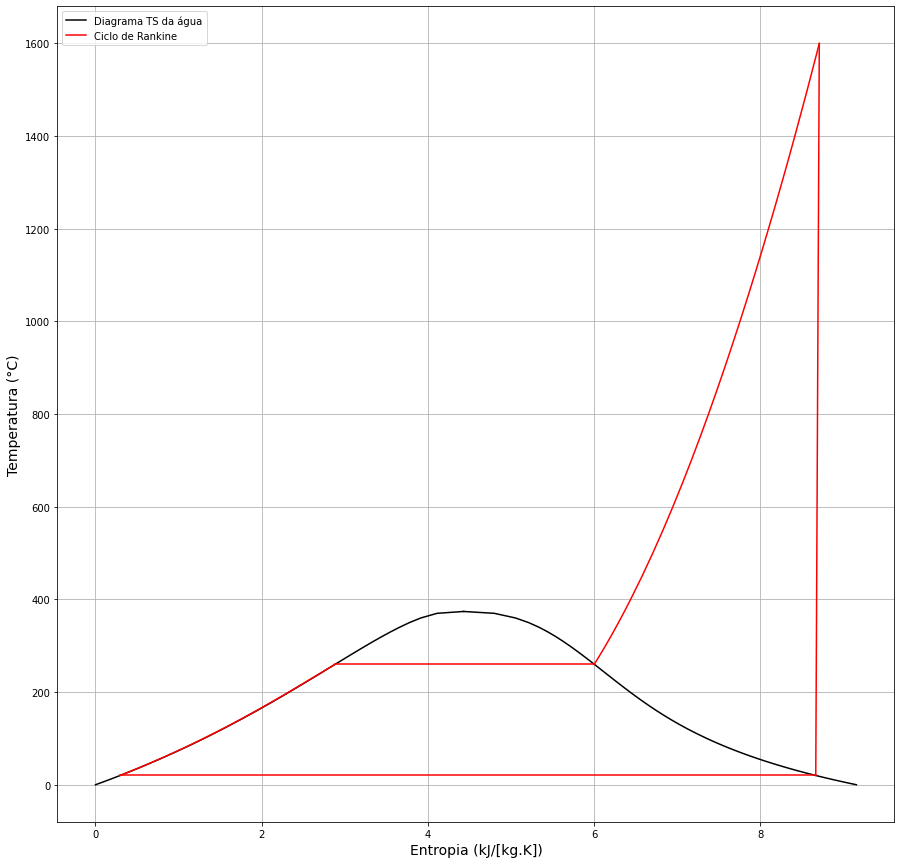

In [13]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(111)
df_TS.plot('sf.1', 'T, ¬∞C', ax = ax1, c = 'black', legend = True, label = 'Diagrama TS da √°gua')
df_TS.plot('sg.1', 'T, ¬∞C', ax = ax1, c = 'black', legend = False)
df_H2O.plot('s.3', 'T', ax = ax1, c = 'red', legend = True, label = 'Ciclo de Rankine')
ax1.plot([2.8844, 6.0028], [260, 260], c = 'red')
ax1.plot(entrop_vap, temp_vap, c = 'red')
ax1.plot([entrop_vap[-1], 8.6680], [temp_vap[-1], 20], c = 'red')
ax1.plot([8.6680, 0.2965], [20, 20], c = 'red')
plt.xlabel('Entropia (kJ/[kg.K])', fontsize = 14)
plt.ylabel('Temperatura (¬∞C)', fontsize = 14)

plt.grid()

plt.show()

Al√©m disso, √© poss√≠vel calcular a entalpia envolvida no condensador, a partir da entalpia de evapora√ß√£o da √°gua √† temperatura de 20 ¬∞C e da massa de √°gua utilizada.

In [14]:
ENTALPIA_EVAP_20 = -2454.1 # kJ/kg

ENTALPIA_CONDENSADOR = entalpia_condensador(ENTALPIA_EVAP_20, MASSA_AGUA) # kJ
print(ENTALPIA_CONDENSADOR)

-7459423.587134847


Portanto, a entalpia envolvida no condensador foi igual a **-7459423.58 kJ**.

### Bomba
A √°gua l√≠quida condensada √© pressurizada por uma bomba para retornar √† caldeira, onde ser√° aquecida novamente. Durante a compress√£o adiab√°tica realizada pela bomba, a entropia da √°gua √© constante. A temperatura da √°gua √© geralmente considerada constante durante a compress√£o adiab√°tica.

## Problema B

Para o c√°lculo da efic√™ncia te√≥rica do ciclo de rankine, √© necess√°rio utilizar as constantes obtidas anteriormente. Portanto, √© poss√≠vel pensar em um coeficiente de efici√™ncia como sendo a raz√£o entre o trabalho realizado e a energia adicionada ao sistema, ou seja:

$
\eta_R = \frac{W_T - W_B}{Q_{ext}}
$

Sendo que $W_T$ √© o trabalho realizado na turbina, $W_B$ √© o trabalho realizado na bomba e $Q_{ext}$ √© o calor externo adicionado ao boiler. Em termos de entalpia, a equa√ß√£o fica:

$
\eta_R = \frac{(h_2 - h_3) - (h_1 - h_4)}{h_2 - h_1}
$

Remanejando os termos, √© poss√≠vel obter que:

$
\eta_R = \frac{(h_2 - h_1) - (h_3 - h_4)}{h_2 - h_1}
$

E, portanto:

$
\eta_R = 1 - \frac{h_3 - h_4}{h_2 - h_1}
$

Levando em conta que $h_4 - h_3$ √© igual √† entalpia utilizada no condensador e que $h_2 - h_1$ √© igual a entalpia utilizada no boiler, √© poss√≠vel descrever a efici√™ncia te√≥rica do ciclo de rankine como:

$
\eta_R = 1 - \frac{- H_C}{H_B}
$

Portanto, √© poss√≠vel calcular a efici√™ncia a partir das entalpias calculadas no problema 1.

In [15]:
EFICIENCIA_RANKINE = eficiencia_rankine(ENTALPIA_BOILER, ENTALPIA_CONDENSADOR)

print(EFICIENCIA_RANKINE)

0.5707123902898016


Ou seja, a efici√™ncia te√≥rica para o ciclo de rankine montado √© igual a, aproximadamente, 57.1%, isso significa que a quantidade total de trabalho realizado na turbina √© igual ao produto da entalpia adicionada ao ciclo pela efici√™ncia do ciclo.

In [16]:
TRABALHO_GERADO = EFICIENCIA_RANKINE*ENTALPIA_COMBUSTAO # kJ
print(TRABALHO_GERADO)

9916860.792865142


Ou seja, ao fim de todo o processo desenvolvido ao longo desse projeto, a quantidade total de trabalho gerado foi de **9916860.79 kJ**.

## Problema C

O ciclo de Carnot √© um modelo ideal para ciclos termodin√¢micos, em que s√£o consideradas uma fonte de temperatura quente e uma fonte de temperatura fria, a efici√™ncia m√°xima, dada pelo ciclo de Carnot, √© obtida como:

$
\eta_C = 1 - \frac{T_f}{T_q}
$

In [17]:
eficiencia_ciclo_carnot(TEMP_FINAL, TEMP_INIT)

0.8434989189333476

Ou seja, a efici√™ncia m√°xima de um ciclo termodin√¢mico nessas condi√ß√µes √© de 84.3%. √â poss√≠vel notar que a efici√™ncia obtida pelo ciclo de rankine √© menor que a efici√™ncia do ciclo de Carnot, em coer√™ncia com a defini√ß√£o de que o ciclo de Carnot representa a maior efici√™ncia te√≥rica para um ciclo termodin√¢mico.

# Acesse o reposit√≥rio do projeto!

Para melhor compreens√£o de cade etapa e de cada escolha do nosso projeto, acesse, clicando aqui ou no link abaixo, nosso [Reposit√≥rio do Github](https://github.com), onde est√£o armazenados todos os notebooks e informa√ß√µes referentes aos desafios:

https://github.com/*************

Convidamos voc√™, tamb√©m, a conferir o arquivo "funcoes_desafio_4", em que est√£o as fun√ß√µes utilizadas para completar esse desafio.

#
## Refer√™ncias
- Livro An Introduction to Thermal Physics, Daniel V. Schroeder, Editora Addison-Wesley.
- Livro Physical Chemistry: A Molecular Approach, Donald A. McQuarrie, Editora Univesity Science Books.
        Se√ß√µes 19-10, 10-11 e 23-1.
- Livro Richard Feynman, Li√ß√µes de F√≠sica Vol 1, Editora Bookman.
        Cap√≠tulo de Teoria Cin√©tica dos Gases